<a href="https://colab.research.google.com/github/lavatus/CS114.L21/blob/main/Predict_Score_CK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deadline Machine Learning

## **I) Reference source**
* [Github lớp thứ 2](https://github.com/PhanTung-06/CS114.L21/blob/main/ProcessDataWecode/Dead24_05.ipynb)

## **II) Process data**


In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
wecode = pd.read_csv('/content/drive/MyDrive/Data/wecode.csv')
score_training = pd.read_csv('/content/drive/MyDrive/Data/score_training.csv')

In [36]:
wecode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264606 entries, 0 to 264605
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             264606 non-null  int64 
 1   assignment_id  264606 non-null  int64 
 2   problem_id     264606 non-null  int64 
 3   user_id        264606 non-null  int64 
 4   is_final       264606 non-null  int64 
 5   status         264605 non-null  object
 6   pre_score      264606 non-null  int64 
 7   coefficient    264606 non-null  object
 8   file_name      264606 non-null  object
 9   language_id    264606 non-null  int64 
 10  created_at     264606 non-null  object
 11  updated_at     264606 non-null  object
dtypes: int64(7), object(5)
memory usage: 24.2+ MB


In [37]:
wecode

,id,assignment_id,problem_id,user_id,is_final,status,pre_score,coefficient,file_name,language_id,created_at,updated_at
0,4,0,3,4,1,SCORE,10000,100,solution-0,2,2020-10-30 10:58:11,2020-10-30 10:58:19
1,5,0,4,4,1,SCORE,10000,100,solution-1,2,2020-10-30 11:07:09,2020-10-30 11:07:17
2,6,0,5,4,0,Compilation Error,0,100,solution-2,2,2020-10-30 11:08:01,2020-10-30 11:23:36
3,7,0,5,4,0,Compilation Error,0,100,solution-3,2,2020-10-30 11:11:41,2020-10-30 11:11:42
4,8,0,5,4,0,Compilation Error,0,100,solution-4,2,2020-10-30 11:15:06,2020-10-30 11:15:07
...,...,...,...,...,...,...,...,...,...,...,...,...
264601,266667,0,25,1796,0,SCORE,0,100,solution-3977,4,2021-04-28 09:34:20,2021-04-28 09:34:27
264602,266668,0,25,1796,0,Compilation Error,0,100,solution-3978,2,2021-04-28 09:35:07,2021-04-28 09:35:08
264603,266669,0,25,1796,1,SCORE,10000,100,solution-3979,4,2021-04-28 09:35:15,2021-04-28 09:35:21
264604,266670,0,150,255,1,SCORE,6250,100,solution-3980,2,2021-05-11 01:34:57,2021-05-11 01:35:28


In [38]:
score_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      975 non-null    int64 
 1   QT      973 non-null    object
 2   GK      974 non-null    object
 3   TH      974 non-null    object
 4   CK      974 non-null    object
 5   TBM     974 non-null    object
 6   TBTL    974 non-null    object
dtypes: int64(1), object(6)
memory usage: 53.4+ KB


In [39]:
score_training.head(10)

,id,QT,GK,TH,CK,TBM,TBTL
0,22,10,9,8.5,8.5,8.8,8.52
1,24,10,8,10,9.5,9.4,8.41
2,27,10,10,10,10,10,8.67
3,28,10,9.5,7.5,9.5,9.2,7.39
4,29,10,9.5,5,8.5,8.2,08.05
5,30,10,10,9,9,9.3,8.63
6,34,,,9,6.5,,6.24
7,35,7,9.5,6,4.5,6.2,5.75
8,36,4.5,8,9,7,7.6,8.51
9,37,5.5,5.5,7.5,7.5,6.9,8.27


In [40]:
new_wecode = pd.DataFrame(wecode['user_id'])
new_wecode['Sum_Problems'] = pd.DataFrame(wecode['is_final'])
new_wecode.insert(2,'Sum_Submits', 1)
new_wecode['Sum_Correct_Submits'] = pd.DataFrame(map(int, (wecode['pre_score'] == 10000)))
new_wecode['Sum_Correct_Problems'] = pd.DataFrame(map(int, (wecode['pre_score'] == 10000) & (wecode['is_final'] == 1)))
new_wecode['Sum_Pre_Scores'] = wecode.loc[wecode['is_final'] == 1, ['pre_score']]
new_wecode.columns = ['id', 'Sum_Problems', 'Sum_Submits','Sum_Correct_Submits', 'Sum_Correct_Problems','Sum_Pre_Scores']
#new_wecode.columns = ['id', 'Sum_Problems', 'Sum_Submits','Sum_Correct_Submits', 'Sum_Correct_Problems']
new_wecode = new_wecode.groupby(['id']).sum()

### Idea 1

In [41]:
# Tính tỉ lệ nộp bài đúng trên tổng số bài đã nộp
new_wecode['idea1'] = new_wecode['Sum_Correct_Problems'] / new_wecode['Sum_Problems']

### Idea 2

In [42]:
# Tính xem 1 problem cần bao nhiêu lần submit để hoàn thành
new_wecode['idea2'] =  new_wecode['Sum_Submits'] / new_wecode['Sum_Correct_Problems'] 

### Idea 3

In [43]:
# Tính tỉ lệ hoàn thành 1 problem
new_wecode['idea3'] =   new_wecode['Sum_Correct_Problems'] / new_wecode['Sum_Submits'] 

In [44]:
new_wecode

,Sum_Problems,Sum_Submits,Sum_Correct_Submits,Sum_Correct_Problems,Sum_Pre_Scores,idea1,idea2,idea3
id,,,,,,,,
1,2,2,1,1,10000.0,0.500000,2.000000,0.500000
4,38,54,44,37,370000.0,0.973684,1.459459,0.685185
5,5,6,3,3,30000.0,0.600000,2.000000,0.500000
6,88,130,89,85,850000.0,0.965909,1.529412,0.653846
7,2,5,0,0,9209.0,0.000000,inf,0.000000
...,...,...,...,...,...,...,...,...
1860,48,76,29,28,329665.0,0.583333,2.714286,0.368421
1862,6,12,4,4,40000.0,0.666667,3.000000,0.333333
1864,63,187,30,28,439741.0,0.444444,6.678571,0.149733


## **III) Merge data**

In [45]:
CK = score_training[['id','QT','GK','TH','CK']]
#CK = score_training[['id','CK']]

In [46]:
data_final = pd.merge(new_wecode, CK, on='id',how='outer')
data_final = data_final.apply(pd.to_numeric,  errors='coerce')
data_final.replace([np.inf, -np.inf], np.nan, inplace=True)
data_final = data_final.dropna()

In [47]:
data_final

,id,Sum_Problems,Sum_Submits,Sum_Correct_Submits,Sum_Correct_Problems,Sum_Pre_Scores,idea1,idea2,idea3,QT,GK,TH,CK
9,24,77.0,164.0,80.0,72.0,750299.0,0.935065,2.277778,0.439024,10.0,8.0,10.0,9.5
10,27,5.0,13.0,4.0,3.0,39000.0,0.600000,4.333333,0.230769,10.0,10.0,10.0,10.0
11,29,80.0,199.0,75.0,72.0,762760.0,0.900000,2.763889,0.361809,10.0,9.5,5.0,8.5
14,35,151.0,297.0,152.0,145.0,1477000.0,0.960265,2.048276,0.488215,7.0,9.5,6.0,4.5
15,37,102.0,312.0,100.0,93.0,979712.0,0.911765,3.354839,0.298077,5.5,5.5,7.5,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,1771,74.0,200.0,51.0,49.0,587271.0,0.662162,4.081633,0.245000,0.0,5.0,4.0,5.5
1151,1856,31.0,64.0,23.0,23.0,270790.0,0.741935,2.782609,0.359375,5.0,5.5,7.0,7.5
1152,1857,40.0,55.0,37.0,37.0,386000.0,0.925000,1.486486,0.672727,5.0,4.5,10.0,4.0
1153,1859,30.0,31.0,3.0,3.0,39000.0,0.100000,10.333333,0.096774,8.0,5.0,10.0,1.5


## **IV) Visualization**

In [48]:
data_plot = data_final.copy()
data_plot = data_plot.sort_values(by='CK', ascending=False)

### Idea 1

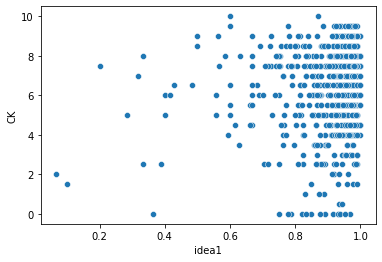

In [49]:
sns.scatterplot(x="idea1", y="CK", data=data_plot)

### Sum Correct Problem and CK

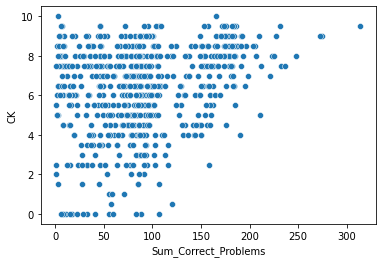

In [50]:
sns.scatterplot(x="Sum_Correct_Problems", y="CK", data=data_plot)

### Idea 2

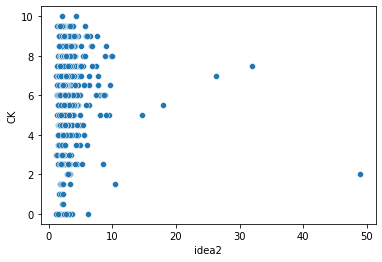

In [51]:
sns.scatterplot(x="idea2", y="CK", data=data_plot)

### Sum Problem and CK

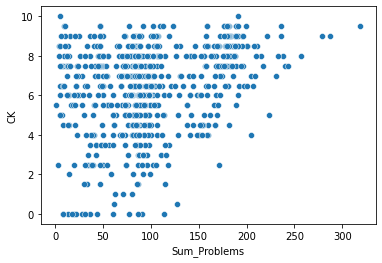

In [52]:
sns.scatterplot(x="Sum_Problems", y="CK",data=data_plot)

### Sum Pre Scores and CK


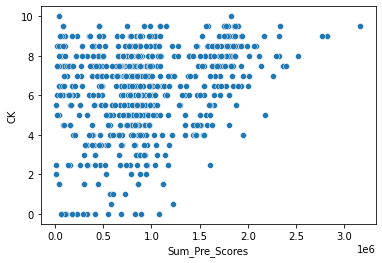

In [53]:
sns.scatterplot(x="Sum_Pre_Scores", y="CK",data=data_plot)

### Idea 3

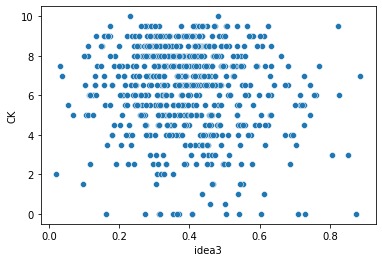

In [54]:
sns.scatterplot(x="idea3", y="CK", data=data_plot)

### QT and CK

In [55]:
#sns.scatterplot(x="QT", y="CK", data = data_plot)

## V) Train


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import math

### Split data to  data test and  train 

### Trích lọc data có ảnh hưởng đến điểm CK 
Từ data visualization ta nhận thấy có trường sau đây không có ảnh hưởng(rất ít) đến điểm CK :
* Idea1
* Id

In [57]:
data_train = data_final.copy()
CK = data_train['CK']
data_train.drop(columns=['CK','idea1','id'],inplace = True)
#data_train = data_train[['QT','GK','TH']]

In [58]:
x_train,x_test,y_train,y_test = train_test_split(data_train,CK,test_size=0.2, random_state=0)

### x_train

In [59]:
x_train

,Sum_Problems,Sum_Submits,Sum_Correct_Submits,Sum_Correct_Problems,Sum_Pre_Scores,idea2,idea3,QT,GK,TH
1016,199.0,421.0,187.0,184.0,1896416.0,2.288043,0.437055,8.0,7.0,8.5
158,85.0,213.0,90.0,84.0,848888.0,2.535714,0.394366,8.5,2.0,9.0
413,87.0,164.0,70.0,70.0,819360.0,2.342857,0.426829,8.5,4.5,6.0
234,90.0,502.0,120.0,87.0,881333.0,5.770115,0.173307,10.0,9.0,10.0
540,73.0,229.0,73.0,71.0,710000.0,3.225352,0.310044,8.0,8.5,7.0
...,...,...,...,...,...,...,...,...,...,...
25,100.0,349.0,97.0,95.0,973888.0,3.673684,0.272206,5.5,5.0,7.5
584,69.0,281.0,60.0,60.0,627554.0,4.683333,0.213523,7.0,6.0,7.5
297,152.0,375.0,156.0,149.0,1507776.0,2.516779,0.397333,10.0,7.5,3.5
998,90.0,214.0,91.0,90.0,900000.0,2.377778,0.420561,9.0,10.0,10.0


In [60]:
y_train

1016    9.5
158     5.0
413     7.5
234     9.0
540     6.0
       ... 
25      4.5
584     7.0
297     6.0
998     8.0
893     9.0
Name: CK, Length: 539, dtype: float64

### Sacle data 

In [61]:
#scaler = StandardScaler()
#x_train = scaler.fit_transform(x_train)
#x_test = scaler.transform(x_test)

### Train model and caculate MSE

In [62]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
y_pre = model.predict(x_test)
y_pre = np.round((y_pre*2))/2

In [64]:
y_pre

array([3.5, 8.5, 7.5, 7.5, 7.5, 6.5, 6.5, 7.5, 6.5, 6.5, 6. , 7.5, 6. ,
       5. , 5.5, 7.5, 7. , 6. , 7.5, 6.5, 8. , 6.5, 6.5, 7.5, 6.5, 8.5,
       5.5, 5.5, 6.5, 7.5, 6. , 8.5, 5.5, 4.5, 6. , 3.5, 7.5, 7. , 6.5,
       8. , 8. , 6. , 4.5, 7. , 2.5, 6.5, 6. , 6.5, 5.5, 7. , 7.5, 7.5,
       4.5, 5.5, 7.5, 5.5, 6. , 6.5, 3.5, 5.5, 1.5, 8. , 5.5, 8. , 8. ,
       7. , 7.5, 7. , 5. , 6.5, 5. , 5.5, 8. , 6. , 1.5, 7.5, 7. , 7. ,
       6. , 5.5, 2. , 5.5, 7. , 8. , 7.5, 5.5, 8. , 7. , 7.5, 9. , 6.5,
       5.5, 6.5, 6.5, 5.5, 7. , 6.5, 3. , 7.5, 7.5, 4. , 7. , 7.5, 8.5,
       7. , 5.5, 4.5, 6.5, 6. , 7.5, 6.5, 8.5, 8. , 5. , 5.5, 7. , 1. ,
       7.5, 8.5, 7. , 5. , 6.5, 7.5, 4.5, 7.5, 6. , 7.5, 4.5, 7. , 6. ,
       6.5, 4.5, 8. , 4.5, 5. ])

In [65]:
y_test

520      6.5
57       9.0
1027     8.5
865      9.5
174     10.0
        ... 
714      7.5
120      2.5
232      7.5
991      6.0
1152     4.0
Name: CK, Length: 135, dtype: float64

In [66]:
mse = metrics.mean_squared_error(y_pre, y_test)
print('MSE : ',mse)

MSE :  2.3962962962962964


## Overall review
* Data còn khá nhỏ dẫn đến việc dự đoán xảy ra sai số vẫn còn cách biệt đáng kể ( cách biệt 2.39 điểm vẫn là số điểm chưa an toàn )
* Việc tìm kiếm các yếu tố ảnh hưởng đến điểm CK còn thiếu sót